# Предсказание коэффициента восстановления золота из золотосодержащей руды

В моем распоряжении данные с различными признаками, зафиксированными в процессе нескольких этапов очистки золотосодежащей руды. Необходимо подготовить модель, которая будет предсказывать коэффициент восстановления золота. Качество модели оценивается метрикой smape, которую необходимо минимизировать.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor, BayesianRidge, LassoLars
from sklearn.linear_model import ARDRegression, PassiveAggressiveRegressor, TheilSenRegressor, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, SCORERS, make_scorer
from sklearn.dummy import DummyRegressor

import warnings

## 1) Подготовка данных

In [2]:
gold_recovery_full = pd.read_csv('C:\\Users\\yansa\\YP_DataSets\\SP9\\gold_recovery_full.csv', index_col='date')
gold_recovery_train = pd.read_csv('C:\\Users\\yansa\\YP_DataSets\\SP9\\gold_recovery_train.csv', index_col='date')
gold_recovery_test = pd.read_csv('C:\\Users\\yansa\\YP_DataSets\\SP9\\gold_recovery_test.csv', index_col='date')

In [3]:
display(gold_recovery_full.head(5))
display(gold_recovery_train.head(5))
display(gold_recovery_test.head(5))

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
gold_recovery_full.shape, gold_recovery_train.shape, gold_recovery_test.shape

((22716, 86), (16860, 86), (5856, 52))

In [5]:
print('Full')
display(gold_recovery_full.dtypes.value_counts())
print('Train')
display(gold_recovery_train.dtypes.value_counts())
print('Test')
display(gold_recovery_test.dtypes.value_counts())

Full


float64    86
dtype: int64

Train


float64    86
dtype: int64

Test


float64    52
dtype: int64

По итогам ознакомления с данными имеются: датасет full - содержащий весь объем данных, train и test - это разбитый full для обучающей и тестовой выборки. В тестовой выборке отсутствует 34 признака. Все данные типа float, кроме колонки date - она типа object.

### Проверим, что эффективность обогащения рассчитана правильно.

Проверяем, правильно ли рассчитана эффективность обогащения на обучающей выборке:

In [6]:
c = 'rougher.output.concentrate_au'
f = 'rougher.input.feed_au'
t = 'rougher.output.tail_au'
gold_recovery_train['recovery_check'] = ((gold_recovery_train[c] * (gold_recovery_train[f] - gold_recovery_train[t])) /
(gold_recovery_train[f] * (gold_recovery_train[c] - gold_recovery_train[t]))) *100
gold_recovery_train[['rougher.output.recovery', 'recovery_check']]

,rougher.output.recovery,recovery_check
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
...,...,...
2018-08-18 06:59:59,89.574376,89.574376
2018-08-18 07:59:59,87.724007,87.724007
2018-08-18 08:59:59,88.890579,88.890579


In [7]:
gold_recovery_train['diff'] = gold_recovery_train['recovery_check'] - gold_recovery_train['rougher.output.recovery']
gold_recovery_train.sort_values(by='diff', ascending=True)[['rougher.output.recovery', 'recovery_check', 'diff']]

,rougher.output.recovery,recovery_check,diff
date,,,
2016-08-11 20:59:59,34.915704,34.915704,-7.105427e-14
2018-05-31 08:59:59,93.532080,93.532080,-7.105427e-14
2018-02-26 23:59:59,90.643794,90.643794,-7.105427e-14
2018-03-18 17:59:59,82.179691,82.179691,-5.684342e-14
2016-08-11 10:59:59,86.517234,86.517234,-5.684342e-14
...,...,...,...
2018-08-11 16:59:59,NaN,112.957805,NaN
2018-08-11 17:59:59,NaN,100.442153,NaN
2018-08-11 18:59:59,NaN,-0.482567,NaN


In [8]:
gold_recovery_train_temp = gold_recovery_train[['rougher.output.recovery', 'recovery_check', 'diff']].dropna()

In [9]:
gold_recovery_train_temp.shape

(14287, 3)

In [10]:
mae = mean_absolute_error(gold_recovery_train_temp['rougher.output.recovery'], gold_recovery_train_temp['recovery_check'])
print(f'MAE = {mae}')

MAE = 9.444891926100695e-15


Расхождения есть, и они измеряются разницой в 15ом числе после запятой. На всех данных MAE составляет 9.444891926100695e-15

In [11]:
gold_recovery_train = gold_recovery_train.drop(['recovery_check', 'diff'], axis=1)

### Проанализируем признаки, недоступные в тестовой выборке.

Определим признаки, которые недоступны в датасете gold_recovery_test, но есть gold_recovery_full

Для начала убедимся, что все названия колонок уникальны:

In [12]:
print(len(list(gold_recovery_train.columns)), len(set(gold_recovery_train.columns)))
print(len(list(gold_recovery_test.columns)), len(set(gold_recovery_test.columns)))

86 86
52 52


In [13]:
missing_columns_test = set(gold_recovery_train.columns) - set(gold_recovery_test.columns)
print(len(missing_columns_test))
missing_columns_test

34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [14]:
for i in set(gold_recovery_test.columns):
    if 'output' in i:
        print(i)

В датасете gold_recovery_test отсутствуют все признаки типа output, а также некоторые признаки типа calculation.

### Первичная предобработка данных.

Удалим из датасета train все колонки, которые отсутствуют в test, кроме target значений (recovery):

In [15]:
missing_columns_test = list(missing_columns_test)
print(len(missing_columns_test))
missing_columns_test.remove('final.output.recovery')
missing_columns_test.remove('rougher.output.recovery')
print(len(missing_columns_test))

34
32


In [16]:
print(gold_recovery_train.shape)
gold_recovery_train = gold_recovery_train.drop(missing_columns_test, axis=1)
print(gold_recovery_train.shape)

(16860, 86)
(16860, 54)


In [17]:
print(gold_recovery_test.shape)
gold_recovery_test = gold_recovery_test.merge(gold_recovery_full[['final.output.recovery', 'rougher.output.recovery']], 
                         left_index=True, right_index=True, how='left')
print(gold_recovery_test.shape)

(5856, 52)
(5856, 54)


Если просто избавиться от всех строк, содержащие Nan, то в train мы потеряем 25% строк, а в test 8% строк. Чтобы часть наблюдений "спасти" по всем колонкам (кроме целевых признаков) заполняю пропуски средними значениями:

In [18]:
columns_to_fill = list(gold_recovery_test.columns)
columns_to_fill.remove('final.output.recovery')
columns_to_fill.remove('rougher.output.recovery')

In [19]:
for i in columns_to_fill:
    mean1 = gold_recovery_train[i].mean()
    gold_recovery_train[i] = gold_recovery_train[i].fillna(mean1)
    mean2 = gold_recovery_test[i].mean()
    gold_recovery_test[i] = gold_recovery_test[i].fillna(mean2)

In [20]:
print(gold_recovery_train.shape)
gold_recovery_train = gold_recovery_train.dropna()
print(gold_recovery_train.shape)

(16860, 54)
(14149, 54)


In [21]:
print(gold_recovery_test.shape)
gold_recovery_test = gold_recovery_test.dropna()
print(gold_recovery_test.shape)

(5856, 54)
(5290, 54)


В итоге в train потеряли 16% строк, а в test 10% строк. Вся потеря связана с Nan в целевых признаках.

## 2) Анализ данных

### Изучим, как меняется концентрация металлов на различных этапах очистки.

Соберем колонки, в которых имеется необходимая информация:

In [22]:
au_columns, ag_columns, pb_columns = [], [], []

for i in list(gold_recovery_full.columns):
    if 'concentrate_au' in i:
        au_columns.append(i)
    elif 'concentrate_ag' in i:
        ag_columns.append(i)
    elif 'concentrate_pb' in i:
        pb_columns.append(i)

Сделаем датасеты по этим колонкам и изучим изменение концентрации на разных этапах:

In [23]:
au_concentrate_data = gold_recovery_full[list(reversed(au_columns))]
ag_concentrate_data = gold_recovery_full[list(reversed(ag_columns))]
pb_concentrate_data = gold_recovery_full[list(reversed(pb_columns))]
print('Au')
display(au_concentrate_data.describe())
print('Ag')
display(ag_concentrate_data.describe())
print('Pb')
display(pb_concentrate_data.describe())

Au


,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,22618.000000,22618.000000,22630.000000
mean,17.879538,29.212289,40.001172
std,6.790112,10.539303,13.398062
min,0.000000,0.000000,0.000000
25%,17.928729,29.374406,42.383721
50%,20.003202,32.359813,44.653436
75%,21.564238,34.770726,46.111999
max,28.824507,45.933934,53.611374


Ag


,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,22618.000000,22618.000000,22627.000000
mean,10.874484,7.691652,4.781559
std,4.377924,3.109306,2.030128
min,0.000000,0.000000,0.000000
25%,10.126646,6.771102,4.018525
50%,11.785127,8.265643,4.953729
75%,13.615299,9.697896,5.862593
max,24.480271,16.081632,16.001945


Pb


,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,22618.000000,22268.000000,22629.000000
mean,6.900646,8.921110,9.095308
std,2.806948,3.706314,3.230797
min,0.000000,0.000000,0.000000
25%,6.374692,7.834690,8.750171
50%,7.572855,9.921116,9.914519
75%,8.477358,11.266100,10.929839
max,18.394042,17.081278,17.031899


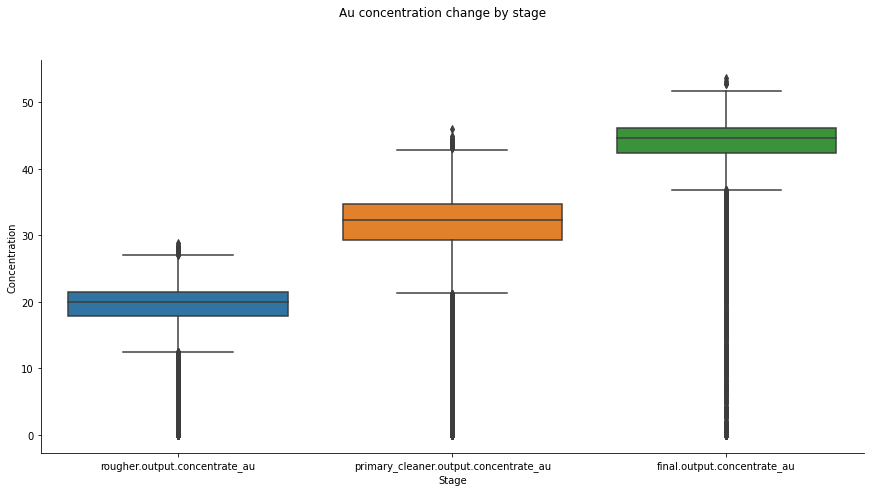

In [24]:
plot = sns.catplot(data=au_concentrate_data, kind='box', height=6, 
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='Stage', y_var='Concentration')
plot.set
plot.fig.suptitle('Au concentration change by stage', y=1.1);

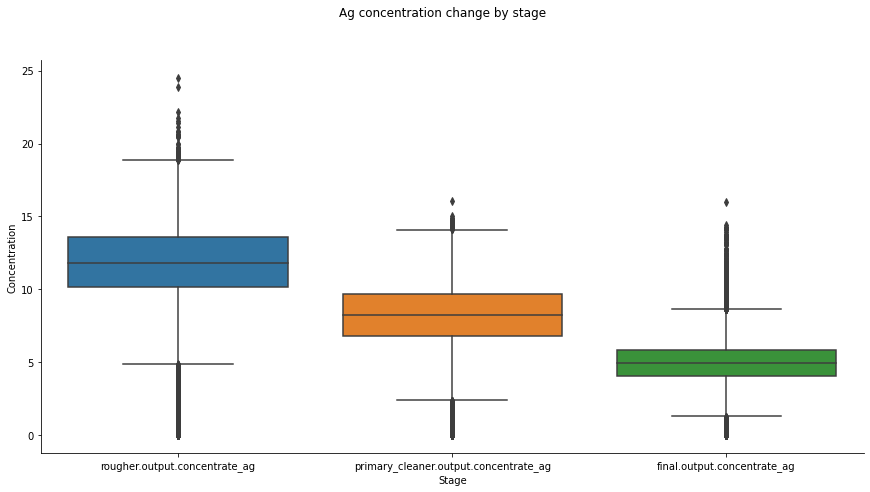

In [25]:
plot = sns.catplot(data=ag_concentrate_data, kind='box', height=6, 
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='Stage', y_var='Concentration')
plot.set
plot.fig.suptitle('Ag concentration change by stage', y=1.1);

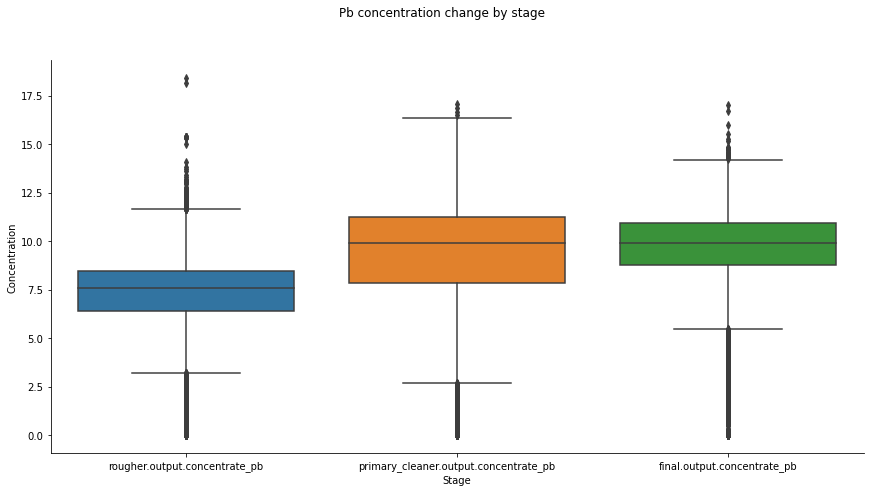

In [26]:
plot = sns.catplot(data=pb_concentrate_data, kind='box', height=6, 
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='Stage', y_var='Concentration')
plot.set
plot.fig.suptitle('Pb concentration change by stage', y=1.1);

Концентрация Au из этапа в этап растет, концентрация Ag в свою очередь падает. Концентрация Pb растет, но сильнее после этапа флотации и слабее после первичной очистки.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [27]:
feed_size_columns = []

for i in list(gold_recovery_full.columns):
    if 'feed_size' in i:
        feed_size_columns.append(i)

In [28]:
feed_size_columns

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [29]:
feed_size_train = gold_recovery_train[list(reversed(feed_size_columns))]
feed_size_test = gold_recovery_test[list(reversed(feed_size_columns))]

In [30]:
print('Train')
display(feed_size_train.describe())
print('Test')
display(feed_size_test.describe())

Train


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,14149.000000,14149.000000
mean,60.095923,7.322310
std,22.304569,0.614062
min,9.659576,1.080000
25%,48.994530,6.960000
50%,55.511718,7.290000
75%,65.918384,7.700000
max,484.967466,10.470000


Test


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5290.000000,5290.000000
mean,55.951095,7.266339
std,19.079954,0.610219
min,0.046369,5.650000
25%,43.906504,6.890000
50%,50.846843,7.250000
75%,62.425276,7.600000
max,392.494040,15.500000


Удалим аномально высокие (>120) размеры гранул сырья в обоих выборках:

In [31]:
gold_recovery_train = gold_recovery_train[gold_recovery_train['rougher.input.feed_size'] < 120]
gold_recovery_test = gold_recovery_test[gold_recovery_test['rougher.input.feed_size'] < 120]

In [32]:
feed_size_train = gold_recovery_train[list(reversed(feed_size_columns))]
feed_size_test = gold_recovery_test[list(reversed(feed_size_columns))]

In [33]:
print('Train')
display(feed_size_train.describe())
print('Test')
display(feed_size_test.describe())

Train


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,13998.000000,13998.000000
mean,58.466221,7.326832
std,13.391624,0.612118
min,9.659576,1.080000
25%,48.970854,6.970000
50%,55.360301,7.300000
75%,65.419001,7.700000
max,119.664018,10.470000


Test


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5243.000000,5243.000000
mean,54.896374,7.270093
std,13.931316,0.608763
min,0.046369,5.650000
25%,43.878942,6.900000
50%,50.614617,7.250000
75%,61.987235,7.603083
max,119.222131,15.500000


Проверим значимы ли различия между распределениями:

In [34]:
print('H0: Дисперсия d1 == Дисперсия d2')
print('H1: Дисперсия d1 != Дисперсия d2')

rougher_d1 = feed_size_train['rougher.input.feed_size'].describe()[2]**2
rougher_d2 = feed_size_test['rougher.input.feed_size'].describe()[2]**2
rougher_df1 =  len(feed_size_train['rougher.input.feed_size']) - 1
rougher_df2 =  len(feed_size_test['rougher.input.feed_size']) - 1

primary_cleaner_d1 = feed_size_train['primary_cleaner.input.feed_size'].describe()[2]**2
primary_cleaner_d2 = feed_size_test['primary_cleaner.input.feed_size'].describe()[2]**2
primary_cleaner_df1 =  len(feed_size_train['primary_cleaner.input.feed_size']) - 1
primary_cleaner_df2 =  len(feed_size_test['primary_cleaner.input.feed_size']) - 1

alpha = 0.05

rougher_results = st.f.sf(rougher_d1/rougher_d2, rougher_df1, rougher_df2)

primary_cleaner_results = st.f.sf(primary_cleaner_d1/primary_cleaner_d2, primary_cleaner_df1, primary_cleaner_df2)

print()
print('Rougher stage')
print('p-значение:', rougher_results)

if (rougher_results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
print('Primary cleaner stage')
print('p-значение:', primary_cleaner_results)

if (primary_cleaner_results < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

H0: Дисперсия d1 == Дисперсия d2
H1: Дисперсия d1 != Дисперсия d2

Rougher stage
p-значение: 0.999744016569584
Не получилось отвергнуть нулевую гипотезу

Primary cleaner stage
p-значение: 0.3170025544122709
Не получилось отвергнуть нулевую гипотезу


Rougher feed size


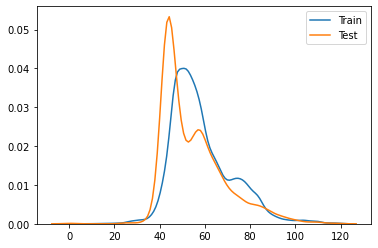

In [35]:
print('Rougher feed size')
sns.kdeplot(data=feed_size_train['rougher.input.feed_size'], label='Train')
sns.kdeplot(feed_size_test['rougher.input.feed_size'], label='Test');

Primary cleaner feed size


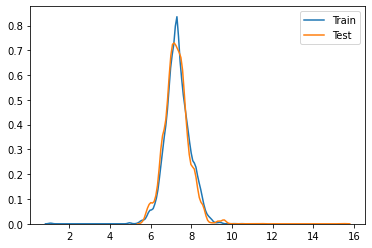

In [36]:
print('Primary cleaner feed size')
sns.kdeplot(data=feed_size_train['primary_cleaner.input.feed_size'], label='Train')
sns.kdeplot(feed_size_test['primary_cleaner.input.feed_size'], label='Test');

Распределения размеров гранул существенно не отличаются на обучающей и тестовой выборках.

### Исследуем суммарную концентрацию всех веществ на разных этапах очистки. Поищем аномалии в данных.

Собрем датафрейм для подсчета суммарной концентрации.

In [37]:
concentrate_columns = []
for i in list(gold_recovery_full.columns):
    if 'concentrate_' in i:
        concentrate_columns.append(i)

In [38]:
concentrate_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [39]:
gold_recovery_full_concentrate = gold_recovery_full[list(reversed(concentrate_columns))]

In [40]:
warnings.filterwarnings(action='ignore')
gold_recovery_full_concentrate['rougher_ttl'] = gold_recovery_full_concentrate.iloc[:, 0:4].sum(axis=1)
gold_recovery_full_concentrate['primary_cleaner_ttl'] = gold_recovery_full_concentrate.iloc[:, 4:8].sum(axis=1)
gold_recovery_full_concentrate['final_ttl'] = gold_recovery_full_concentrate.iloc[:, 8:12].sum(axis=1)
warnings.filterwarnings(action='default')

In [41]:
gold_recovery_full_concentrate = gold_recovery_full_concentrate[['rougher_ttl', 'primary_cleaner_ttl', 'final_ttl']]

Изучим полученные данные:

In [42]:
gold_recovery_full_concentrate.describe()

,rougher_ttl,primary_cleaner_ttl,final_ttl
count,22716.000000,22716.000000,22716.000000
mean,61.378090,54.727256,62.166910
std,23.558863,20.057935,20.954107
min,0.000000,0.000000,0.000000
25%,63.263228,56.112483,67.005682
50%,69.399690,61.693976,69.230638
75%,74.015593,65.286862,71.127337
max,90.964431,80.749343,80.210644


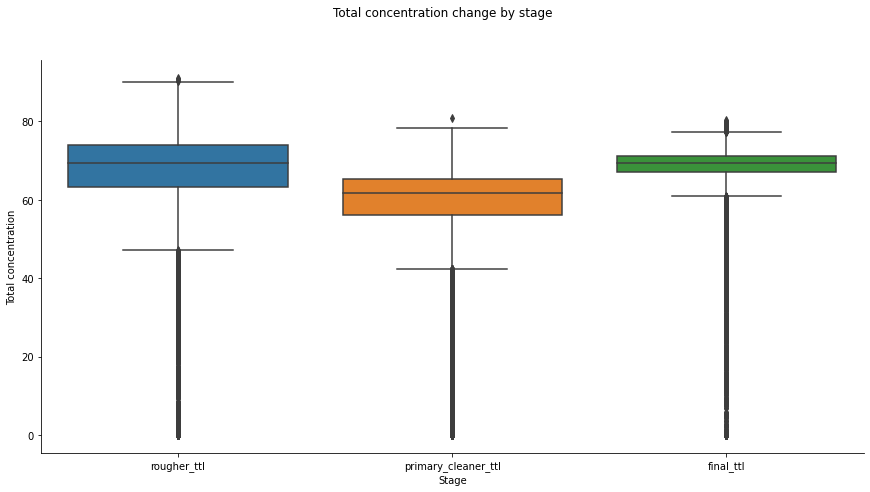

In [43]:
plot = sns.catplot(data=gold_recovery_full_concentrate, kind='box', height=6, 
                    aspect=2, legend_out=False)
plot.set_axis_labels(x_var='Stage', y_var='Total concentration')
plot.set
plot.fig.suptitle('Total concentration change by stage', y=1.1);

In [44]:
gold_recovery_full_concentrate['rougher_ttl'].value_counts()

0.000000     2051
0.040000      439
41.115844      11
65.748985      11
72.423889       6
             ... 
63.910402       1
71.926356       1
56.042368       1
69.053301       1
73.455232       1
Name: rougher_ttl, Length: 20188, dtype: int64

Очень много значений с нулевыми суммарными концентрациями. Эти данные не принесут пользы при обучении модели, и возможно даже ухудшат работу модели.

Чтобы исключить выбросы и не удалить лишнего возьму границу следующим образом: отсеку все, что ниже Q3 - 3IQR.

In [45]:
rougher_ttl_iqr = (gold_recovery_full_concentrate.describe().iloc[6,0] 
                   - gold_recovery_full_concentrate.describe().iloc[4,0])
primary_cleaner_ttl_iqr = (gold_recovery_full_concentrate.describe().iloc[6,1] 
                           - gold_recovery_full_concentrate.describe().iloc[4,1])
final_ttl_iqr = (gold_recovery_full_concentrate.describe().iloc[6,2] 
                 - gold_recovery_full_concentrate.describe().iloc[4,2])
rougher_ttl_iqr, primary_cleaner_ttl_iqr, final_ttl_iqr

(10.752364962018873, 9.174379340702487, 4.12165564484954)

In [46]:
print('Порог отсечения:')
print(gold_recovery_full_concentrate.describe().iloc[4,1] - rougher_ttl_iqr*3)

Порог отсечения:
23.855387889382328


Взял самый большой из получившихся межквартильных размахов и вычел тройное его значение из самого маленького 3его квартиля. Получил порог ниже которых явные выбросы.

In [47]:
indexes_to_drop = list(gold_recovery_full_concentrate[gold_recovery_full_concentrate['rougher_ttl'] < 23.85].index)

In [48]:
print(gold_recovery_train.shape)
gold_recovery_train = gold_recovery_train.drop(indexes_to_drop, errors='ignore')
print(gold_recovery_train.shape)

(13998, 54)
(13671, 54)


In [49]:
print(gold_recovery_test.shape)
gold_recovery_test = gold_recovery_test.drop(indexes_to_drop, errors='ignore')
print(gold_recovery_test.shape)

(5243, 54)
(5144, 54)


Аномалии удалены.

## 3) Постройте модель

### Напишем функцию для расчета метрики smape

In [50]:
def smape(y_true, y_pred):
    result = np.sum(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) * 100/len(y_true)
    return result

In [51]:
def smape_final(rougher, final):
    return  0.25*rougher + 0.75*final

In [52]:
smape_scorer = make_scorer(smape, greater_is_better=False)

### Обучим разные модели и выберем лучшую.

Подготовим датасеты к обучению:

In [53]:
rougher_columns = []
for i in list(gold_recovery_train.columns):
    if 'rougher' in i:
        rougher_columns.append(i)

In [54]:
x_gold_recovery_train_rougher = gold_recovery_train[rougher_columns].drop('rougher.output.recovery', axis=1)
y_gold_recovery_train_rougher = gold_recovery_train['rougher.output.recovery']
x_gold_recovery_train_final = gold_recovery_train.drop(rougher_columns+['final.output.recovery'], axis=1)
y_gold_recovery_train_final = gold_recovery_train['final.output.recovery']

x_gold_recovery_test_rougher = gold_recovery_test[rougher_columns].drop('rougher.output.recovery', axis=1)
y_gold_recovery_test_rougher = gold_recovery_test['rougher.output.recovery']
x_gold_recovery_test_final = gold_recovery_test.drop(rougher_columns+['final.output.recovery'], axis=1)
y_gold_recovery_test_final = gold_recovery_test['final.output.recovery']

display(x_gold_recovery_train_rougher.shape + y_gold_recovery_train_rougher.shape, x_gold_recovery_train_final.shape +
        y_gold_recovery_train_final.shape)
display(x_gold_recovery_test_rougher.shape + y_gold_recovery_test_rougher.shape, x_gold_recovery_test_final.shape +
        y_gold_recovery_test_final.shape)

(13671, 22, 13671)

(13671, 30, 13671)

(5144, 22, 5144)

(5144, 30, 5144)

Добавим регрессионные модели вместе с настраиваемыми гиперпараметрами в словарь:

In [55]:
classifiers = {
    DecisionTreeRegressor(random_state=12345) : {'criterion' : ['mse', 'friedman_mse', 'mae'], 'max_depth' : range(1,40)},
    RandomForestRegressor(random_state=12345) : {'max_depth' : range(3,7)},
    LinearRegression() : {'fit_intercept' : [True, False], 'normalize' : [True, False]},
    BayesianRidge() : {'fit_intercept' : [True, False], 'normalize' : [True, False]},
    LassoLars() : {'fit_intercept' : [True, False], 'normalize' : [True, False]},
    ARDRegression() : {'fit_intercept' : [True, False], 'normalize' : [True, False]},
    PassiveAggressiveRegressor(random_state=12345) : {'fit_intercept' : [True, False]},
    TheilSenRegressor(random_state=12345) : {'fit_intercept' : [True, False]}
}

In [56]:
best_estimators_rougher, best_estimators_final = [], []

In [57]:
%%time
warnings.filterwarnings(action='ignore')
for i in classifiers:
    clf = RandomizedSearchCV(i, classifiers[i], cv=5, scoring=smape_scorer, n_jobs=-1)
    clf.fit(x_gold_recovery_train_rougher, y_gold_recovery_train_rougher)
    best_estimators_rougher.append(clf.best_estimator_)
    clf.fit(x_gold_recovery_train_final, y_gold_recovery_train_final)
    best_estimators_final.append(clf.best_estimator_)
warnings.filterwarnings(action='default')

Wall time: 5min 56s


In [58]:
print(best_estimators_rougher)
print(best_estimators_final)

[DecisionTreeRegressor(max_depth=3, random_state=12345), RandomForestRegressor(max_depth=4, random_state=12345), LinearRegression(), BayesianRidge(normalize=True), LassoLars(normalize=False), ARDRegression(), PassiveAggressiveRegressor(random_state=12345), TheilSenRegressor(max_subpopulation=10000, random_state=12345)]
[DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345), RandomForestRegressor(max_depth=3, random_state=12345), LinearRegression(normalize=True), BayesianRidge(normalize=True), LassoLars(normalize=False), ARDRegression(), PassiveAggressiveRegressor(random_state=12345), TheilSenRegressor(fit_intercept=False, max_subpopulation=10000,
                  random_state=12345)]


Собрем результаты работы моделей в единый датафрейм:

In [59]:
names_list = ['DecisionTreeRegressor', 'RandomForestRegressor', 'LinearRegression', 'BayesianRidge', 
              'LassoLars', 'ARDRegression', 'PassiveAggressiveRegressor', 'TheilSenRegressor']

In [60]:
results_rougher = pd.DataFrame({'Classifier' : [], 'Train smape score' : [], 'Test smape score' : []})
results_final = pd.DataFrame({'Classifier' : [], 'Train smape score' : [], 'Test smape score' : []})

In [61]:
count = 0

for i in best_estimators_rougher:
    i.fit(x_gold_recovery_train_rougher, y_gold_recovery_train_rougher)
    train_smape_score = smape(y_gold_recovery_train_rougher, i.predict(x_gold_recovery_train_rougher))
    test_smape_score = smape(y_gold_recovery_test_rougher, i.predict(x_gold_recovery_test_rougher))
    
    results_rougher = results_rougher.append({
        'Classifier' : names_list[count], 'Train smape score' : train_smape_score, 
        'Test smape score' : test_smape_score}, ignore_index=True)
    count += 1

In [62]:
count = 0

for i in best_estimators_final:
    i.fit(x_gold_recovery_train_final, y_gold_recovery_train_final)
    train_smape_score = smape(y_gold_recovery_train_final, i.predict(x_gold_recovery_train_final))
    test_smape_score = smape(y_gold_recovery_test_final, i.predict(x_gold_recovery_test_final))
    
    results_final = results_final.append({
        'Classifier' : names_list[count], 'Train smape score' : train_smape_score, 
        'Test smape score' : test_smape_score}, ignore_index=True)
    count += 1

In [63]:
print('Rougher')
display(results_rougher.sort_values(by='Test smape score'))
print('Final')
display(results_final.sort_values(by='Test smape score'))

Rougher


,Classifier,Train smape score,Test smape score
3,BayesianRidge,5.024860,4.646473
2,LinearRegression,5.025281,4.649058
1,RandomForestRegressor,4.726418,4.680840
5,ARDRegression,5.087983,4.688655
4,LassoLars,5.216815,5.091975
0,DecisionTreeRegressor,5.137585,5.201721
6,PassiveAggressiveRegressor,6.395637,6.436362
7,TheilSenRegressor,5.734642,7.697059


Final


,Classifier,Train smape score,Test smape score
0,DecisionTreeRegressor,9.803497,8.592194
1,RandomForestRegressor,9.301362,8.774800
4,LassoLars,9.420098,9.771231
5,ARDRegression,9.396308,9.861693
3,BayesianRidge,9.352506,9.903566
2,LinearRegression,9.358354,9.972676
6,PassiveAggressiveRegressor,10.523134,10.210833
7,TheilSenRegressor,10.431656,11.157871


In [64]:
print('Итоговое smape')
print(smape_final(results_rougher.sort_values(by='Test smape score').iloc[0,2], 
            results_final.sort_values(by='Test smape score').iloc[0,2]))

Итоговое smape
7.605764134567821


### Сравним полученные значения с работой модели DummyRegressor.

In [65]:
dummy1 = DummyRegressor(strategy='mean')
dummy2 = DummyRegressor(strategy='median')

In [66]:
print('Dummy mean strategy')
print('-'*30)
print('Rougher')
dummy1.fit(x_gold_recovery_train_rougher, y_gold_recovery_train_rougher)
dummy1_train_rougher = smape(y_gold_recovery_train_rougher, dummy1.predict(x_gold_recovery_train_rougher))
dummy1_test_rougher = smape(y_gold_recovery_test_rougher, dummy1.predict(x_gold_recovery_test_rougher))
print('Train score = ', dummy1_train_rougher)
print('Test score = ', dummy1_test_rougher)
print('-'*30)
print('Final')
dummy1.fit(x_gold_recovery_train_final, y_gold_recovery_train_final)
dummy1_train_final = smape(y_gold_recovery_train_final, dummy1.predict(x_gold_recovery_train_final))
dummy1_test_final = smape(y_gold_recovery_test_final, dummy1.predict(x_gold_recovery_test_final))
print('Train score = ', dummy1_train_final)
print('Test score = ', dummy1_test_final)
print('-'*30)
print('Итоговое smape = ', smape_final(dummy1_test_rougher, dummy1_test_final))

Dummy mean strategy
------------------------------
Rougher
Train score =  7.257384990209832
Test score =  5.39208549790999
------------------------------
Final
Train score =  10.884806897325221
Test score =  10.023384563482212
------------------------------
Итоговое smape =  8.865559797089157


In [67]:
print('Dummy mean strategy')
print('-'*30)
print('Rougher')
dummy2.fit(x_gold_recovery_train_rougher, y_gold_recovery_train_rougher)
dummy2_train_rougher = smape(y_gold_recovery_train_rougher, dummy2.predict(x_gold_recovery_train_rougher))
dummy2_test_rougher = smape(y_gold_recovery_test_rougher, dummy2.predict(x_gold_recovery_test_rougher))
print('Train score = ', dummy2_train_rougher)
print('Test score = ', dummy2_test_rougher)
print('-'*30)
print('Final')
dummy2.fit(x_gold_recovery_train_final, y_gold_recovery_train_final)
dummy2_train_final = smape(y_gold_recovery_train_final, dummy2.predict(x_gold_recovery_train_final))
dummy2_test_final = smape(y_gold_recovery_test_final, dummy2.predict(x_gold_recovery_test_final))
print('Train score = ', dummy2_train_final)
print('Test score = ', dummy2_test_final)
print('-'*30)
print('Итоговое smape = ', smape_final(dummy2_test_rougher, dummy2_test_final))

Dummy mean strategy
------------------------------
Rougher
Train score =  7.19577572904795
Test score =  4.855808063915491
------------------------------
Final
Train score =  10.818899623053808
Test score =  9.551399557230154
------------------------------
Итоговое smape =  8.377501683901487


### Вывод

В процессе проекта были предобработанны полученные данные, проверена правильность рассчета эффективности обогащения и удалены аномальные данные. Были подобраны гиперпараметры для 8 регрессионных моделей с целью предсказания коэффициента восстановления золота из золотосодержащей руды. 

Наилучшие результаты для предсказания rougher.output.recovery показала модель BayesianRidge со значением 4.646473, наихудший TheilSenRegressor со значением 7.697059. 

Наилучшие результаты для предсказания final.output.recovery показала модель DecisionTreeRegressor со значением 8.592194, наихудший TheilSenRegressor со значением 11.157871. 

Итоговое smape для лучших моделей получилось 7.6057. 

При этом если обучать модель с помощью DummyRegressor на медианных значениях итоговое smape выходит 8.3775.

Благодаря обученным моделям получилось выиграть 0.7718 в метрике итоговое smape.